# Actividad 1

1. Seleccionar la base de datos de referencia Internacional 

2. Seleccionar una base de datos de referencia y estudio nacional (de contextualización) 

3. Identificar los sitios web con información de variables o datos que soporten nuestra contextualización 

## Trabajo con la base de contexto internacional 

1. Identificar los Datos categóricos 

2. Identificar los datos numéricos 

Haber definido una(s) variable(s) de predicación o de interés 

 

Realizar un proceso de preprocesamiento 

Análisis basado en tablas dinámicas (Excel - Pandas) 

Seleccionar los datos que se muestre más relevantes, para ello se requiere calcular media, median moda, desviación estándar, varianza para datos no agrupados.  

 

Para las variables categóricas se requiere realizar un análisis basado en la correlación  

Para las variables NO categóricas se requiere un análisis ANOVA  

## Base de datos internacional

Consta de 28 columnas y 820599 registros de crímenes ocurridos en Estados Unidos desde el año 2020 a octubre 2023.

In [108]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [109]:
df = pd.read_csv('./Crime_Data_from_2020_to_Present.csv', parse_dates=["DATE OCC", "Date Rptd"])
df.head(5)

C:\Users\edwin\AppData\Local\Temp\ipykernel_20460\37744482.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\edwin\AppData\Local\Temp\ipykernel_20460\37744482.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [110]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [111]:
print(df.shape)
df.info()

(820599, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DR_NO           820599 non-null  int64         
 1   Date Rptd       820599 non-null  datetime64[ns]
 2   DATE OCC        820599 non-null  datetime64[ns]
 3   TIME OCC        820599 non-null  int64         
 4   AREA            820599 non-null  int64         
 5   AREA NAME       820599 non-null  object        
 6   Rpt Dist No     820599 non-null  int64         
 7   Part 1-2        820599 non-null  int64         
 8   Crm Cd          820599 non-null  int64         
 9   Crm Cd Desc     820599 non-null  object        
 10  Mocodes         707114 non-null  object        
 11  Vict Age        820599 non-null  int64         
 12  Vict Sex        712653 non-null  object        
 13  Vict Descent    712645 non-null  object        
 14  Premis Cd       820589 

Para la identificación de datos categóricos o no categóricos inicialmente se separaron los datos de tipo numérico, de los datos no numéricos.

In [112]:
df.dtypes

DR_NO                      int64
Date Rptd         datetime64[ns]
DATE OCC          datetime64[ns]
TIME OCC                   int64
AREA                       int64
AREA NAME                 object
Rpt Dist No                int64
Part 1-2                   int64
Crm Cd                     int64
Crm Cd Desc               object
Mocodes                   object
Vict Age                   int64
Vict Sex                  object
Vict Descent              object
Premis Cd                float64
Premis Desc               object
Weapon Used Cd           float64
Weapon Desc               object
Status                    object
Status Desc               object
Crm Cd 1                 float64
Crm Cd 2                 float64
Crm Cd 3                 float64
Crm Cd 4                 float64
LOCATION                  object
Cross Street              object
LAT                      float64
LON                      float64
dtype: object

Se identificaron además los datos faltantes

<Axes: >

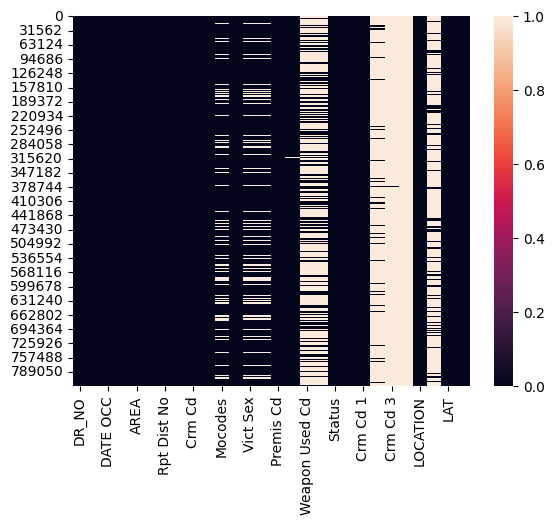

In [113]:
sns.heatmap(df.isna())

In [114]:
df.columns[df.dtypes=="int64"], df.columns[df.dtypes=="float64"]

(Index(['DR_NO', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2', 'Crm Cd',
        'Vict Age'],
       dtype='object'),
 Index(['Premis Cd', 'Weapon Used Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3',
        'Crm Cd 4', 'LAT', 'LON'],
       dtype='object'))

In [115]:
df.columns[df.dtypes=="object"]

Index(['AREA NAME', 'Crm Cd Desc', 'Mocodes', 'Vict Sex', 'Vict Descent',
       'Premis Desc', 'Weapon Desc', 'Status', 'Status Desc', 'LOCATION',
       'Cross Street'],
      dtype='object')

Se pudo identificar a partir de la caracterización del conjunto de datos que las columnas que contenían los valores numéricos en realidad contenían una codificación de otras columnas, es decir, a pesar de ser numéricos, en realidad también eran categóricos, dado que el valor representaba el índice de una categoría de otra columna del dataset, por lo que fueron eliminadas.

In [116]:
filtered_df = df.drop(labels=['DR_NO','AREA', 'Part 1-2', 'Crm Cd', 'LOCATION', 'Cross Street', 'Premis Cd', 'Weapon Used Cd', 'Weapon Desc', 'Status', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Premis Desc', 'Status Desc', 'Mocodes'], axis=1)
filtered_df.head(5)

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LAT,LON
0,2020-01-08,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,B,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,25,M,H,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,34.2198,-118.4468


In [117]:
#filtered_df = df[df['Crm Cd Desc'].str.contains('THEFT|PICK|BULGLARY')==True]
print(filtered_df.shape)
#filtered_df.dropna(thresh=4, inplace=True)
print(filtered_df.shape)
filtered_df.head(5)

(820599, 11)
(820599, 11)


,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LAT,LON
0,2020-01-08,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,B,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,25,M,H,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,34.2198,-118.4468


A partir del filtrado de columnas, se vuelven a revisar los datos faltantes, reduciendo la cuenta

<Axes: >

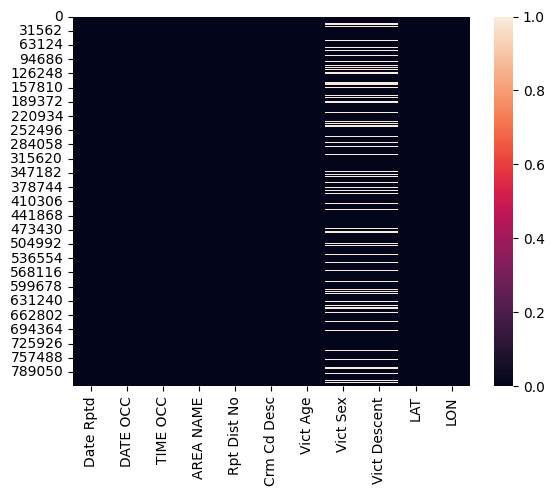

In [118]:
sns.heatmap(filtered_df.isna())

In [119]:
filtered_df.describe()

,Date Rptd,DATE OCC,TIME OCC,Rpt Dist No,Vict Age,LAT,LON
count,820599,820599,820599.000000,820599.000000,820599.000000,820599.000000,820599.000000
mean,2021-12-24 09:28:32.669404416,2021-12-13 21:07:47.890894336,1335.627492,1117.592487,29.806031,33.604765,-116.725860
min,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,101.000000,-3.000000,0.000000,-118.667600
25%,2021-01-24 00:00:00,2021-01-11 00:00:00,900.000000,621.000000,7.000000,34.010200,-118.428700
50%,2022-01-17 00:00:00,2022-01-02 00:00:00,1415.000000,1142.000000,31.000000,34.057500,-118.319300
75%,2022-11-30 00:00:00,2022-11-17 00:00:00,1900.000000,1617.000000,45.000000,34.161600,-118.273100
max,2023-10-16 00:00:00,2023-10-16 00:00:00,2359.000000,2199.000000,120.000000,34.334300,0.000000
std,NaN,NaN,654.020941,609.360686,21.776511,3.970446,13.786369


In [120]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820599 entries, 0 to 820598
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date Rptd     820599 non-null  datetime64[ns]
 1   DATE OCC      820599 non-null  datetime64[ns]
 2   TIME OCC      820599 non-null  int64         
 3   AREA NAME     820599 non-null  object        
 4   Rpt Dist No   820599 non-null  int64         
 5   Crm Cd Desc   820599 non-null  object        
 6   Vict Age      820599 non-null  int64         
 7   Vict Sex      712653 non-null  object        
 8   Vict Descent  712645 non-null  object        
 9   LAT           820599 non-null  float64       
 10  LON           820599 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 68.9+ MB


A continuación se realiza la codificación y revisión de clases existentes en las variables categóricas como el sexo, descendencia o género de la víctima.

In [121]:
filtered_df['Vict Sex'].unique()

array(['F', 'M', 'X', nan, 'H', '-'], dtype=object)

In [122]:
filtered_df['Vict Descent'].unique()

array(['B', 'H', 'X', 'W', 'A', 'O', nan, 'C', 'F', 'K', 'I', 'V', 'Z',
       'J', 'P', 'S', 'G', 'U', 'D', 'L', '-'], dtype=object)

In [123]:
filtered_df['Crm Cd Desc'].unique()

array(['BATTERY - SIMPLE ASSAULT',
       'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE',
       'VANDALISM - MISDEAMEANOR ($399 OR UNDER)',
       'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)',
       'RAPE, FORCIBLE', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
       'OTHER MISCELLANEOUS CRIME',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'BURGLARY FROM VEHICLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'ARSON', 'INTIMATE PARTNER - SIMPLE ASSAULT',
       'THEFT PLAIN - PETTY ($950 & UNDER)', 'THEFT OF IDENTITY',
       'ROBBERY', 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'BURGLARY', 'VEHICLE - STOLEN',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'BRANDISH WEAPON', 'INTIMATE PARTNER - AGGRAVATED ASSAULT',
       'BUNCO, GRAND THEFT', 'THEFT, PERSON',
       'BATTERY WITH SEXUAL CONTACT', 'BIKE - STOLEN',
       'BATTERY POLICE (SIMPLE)',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'VIOLAT

In [124]:
filtered_df.head(5)

,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Rpt Dist No,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,LAT,LON
0,2020-01-08,2020-01-08,2230,Southwest,377,BATTERY - SIMPLE ASSAULT,36,F,B,34.0141,-118.2978
1,2020-01-02,2020-01-01,330,Central,163,BATTERY - SIMPLE ASSAULT,25,M,H,34.0459,-118.2545
2,2020-04-14,2020-02-13,1200,Central,155,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,0,X,X,34.0448,-118.2474
3,2020-01-01,2020-01-01,1730,N Hollywood,1543,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,W,34.1685,-118.4019
4,2020-01-01,2020-01-01,415,Mission,1998,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,X,34.2198,-118.4468


Dado que existían datos atípicos, se filtraron a partir de cuartiles de manera que se obtengan los registros más relevantes para las categorías seleccionadas

In [125]:
filtered_df["time_deltas"] = (df['Date Rptd'] - df['DATE OCC']) / np.timedelta64(1, 'D')

In [126]:
q1 = filtered_df["LON"].quantile(0.01)
filtered_df = filtered_df[filtered_df["LON"] > q1]
q2 = filtered_df["LAT"].quantile(0.01)
filtered_df = filtered_df[filtered_df["LAT"] > q2]
q3 = filtered_df["time_deltas"].quantile(0.05)
filtered_df = filtered_df[filtered_df["time_deltas"] > q3]
filtered_df = filtered_df.dropna()

Por medio de la librería sklearn, es posible etiquetar las columnas de tipo string a través de un valor numérico

In [127]:
encoder_sex = LabelEncoder()
filtered_df["Vict Sex"] = encoder_sex.fit_transform(filtered_df['Vict Sex'])
encoder_descent = LabelEncoder()
filtered_df["Vict Descent"] = encoder_descent.fit_transform(filtered_df['Vict Descent'])
encoder_area = LabelEncoder()
filtered_df['AREA NAME'] = encoder_area.fit_transform(filtered_df['AREA NAME'])
encoder_crm = LabelEncoder()
filtered_df['Crm Cd Desc'] = encoder_crm.fit_transform(filtered_df['Crm Cd Desc'])

Algo importante a mencionar es la poca correlación que existe entre el conjunto de datos.

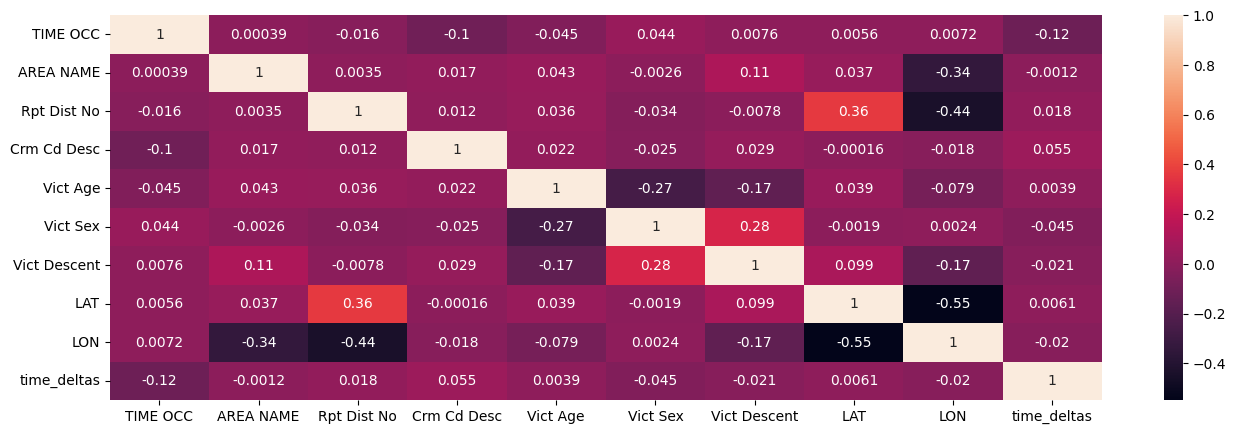

In [128]:
corr_matrix = filtered_df.corr(numeric_only=True)
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

## Tablas dinámicas

Una posible manera de obtener algo más de información sobre el conjunto de datos es por medio de relacionar columnas entre sí, así que se recurrió a la generación de tablas dinámicas por medio de 
```python
pd.pivot_table
```

In [129]:
pd.pivot_table(filtered_df, values='Vict Age', index=['Vict Sex'], aggfunc={"Vict Age": "mean", "Vict Sex":"count"}, dropna=True)

,Vict Age,Vict Sex
Vict Sex,,
0,38.804350,143680
1,36.839286,56
2,38.307218,156433
3,2.415936,28514


In [130]:
print(encoder_descent.classes_)
pd.pivot_table(filtered_df, values='Vict Age', index=['Vict Descent'], aggfunc={"Vict Age": "mean", "Vict Descent":"count"}, dropna=True)

['-' 'A' 'B' 'C' 'D' 'F' 'G' 'H' 'I' 'J' 'K' 'L' 'O' 'P' 'S' 'U' 'V' 'W'
 'X' 'Z']


,Vict Age,Vict Descent
Vict Descent,,
0,38.000000,1
1,41.416262,9064
2,39.678874,47075
3,34.800000,2425
4,34.152174,46
5,39.970320,2628
6,39.681818,22
7,36.580378,103629
8,36.911765,510


In [131]:
print(encoder_area.classes_)
pd.pivot_table(filtered_df, values=['Vict Descent'], index='AREA NAME', aggfunc={"Vict Descent": pd.Series.mode, 'AREA NAME':'count'}, dropna=True)

['77th Street' 'Central' 'Devonshire' 'Foothill' 'Harbor' 'Hollenbeck'
 'Hollywood' 'Mission' 'N Hollywood' 'Newton' 'Northeast' 'Olympic'
 'Pacific' 'Rampart' 'Southeast' 'Southwest' 'Topanga' 'Van Nuys'
 'West LA' 'West Valley' 'Wilshire']


,AREA NAME,Vict Descent
AREA NAME,,
0,13589,2
1,22746,7
2,14461,17
3,12339,7
4,11319,7
5,10290,7
6,18114,17
7,14128,7
8,19344,17


In [132]:
print(encoder_area.classes_)
pd.pivot_table(filtered_df, values=['LON', 'LAT'], index='AREA NAME', aggfunc={'AREA NAME': 'count', 'LON': 'mean', 'LAT': 'mean'}, dropna=True)

['77th Street' 'Central' 'Devonshire' 'Foothill' 'Harbor' 'Hollenbeck'
 'Hollywood' 'Mission' 'N Hollywood' 'Newton' 'Northeast' 'Olympic'
 'Pacific' 'Rampart' 'Southeast' 'Southwest' 'Topanga' 'Van Nuys'
 'West LA' 'West Valley' 'Wilshire']


,AREA NAME,LAT,LON
AREA NAME,,,
0,13589,33.977725,-118.298807
1,22746,34.047498,-118.250672
2,14461,34.251352,-118.538519
3,12339,34.249529,-118.376255
4,11319,33.770730,-118.286803
5,10290,34.055594,-118.202850
6,18114,34.099732,-118.331061
7,14128,34.257062,-118.450215
8,19344,34.169971,-118.384678


In [133]:
print(encoder_crm.classes_)
pd.pivot_table(filtered_df, values=['Crm Cd Desc'], index='AREA NAME', aggfunc={'Crm Cd Desc':['min', pd.Series.mode, pd.Series.mean, 'max'], 'AREA NAME': 'count'}, dropna=True)

['ARSON' 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'ATTEMPTED ROBBERY'
 'BATTERY - SIMPLE ASSAULT' 'BATTERY ON A FIREFIGHTER'
 'BATTERY POLICE (SIMPLE)' 'BATTERY WITH SEXUAL CONTACT'
 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM' 'BIGAMY'
 'BIKE - ATTEMPTED STOLEN' 'BIKE - STOLEN'
 'BLOCKING DOOR INDUCTION CENTER' 'BOMB SCARE' 'BRANDISH WEAPON' 'BRIBERY'
 'BUNCO, ATTEMPT' 'BUNCO, GRAND THEFT' 'BUNCO, PETTY THEFT' 'BURGLARY'
 'BURGLARY FROM VEHICLE' 'BURGLARY FROM VEHICLE, ATTEMPTED'
 'BURGLARY, ATTEMPTED' 'CHILD ABANDONMENT'
 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT'
 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT'
 'CHILD ANNOYING (17YRS & UNDER)' 'CHILD NEGLECT (SEE 300 W.I.C.)'
 'CHILD PORNOGRAPHY' 'CHILD STEALING' 'CONSPIRACY' 'CONTEMPT OF COURT'
 'CONTRIBUTING' 'COUNTERFEIT' 'CREDIT CARDS, FRAUD USE ($950 & UNDER'
 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)' 'CRIMINAL HOMICIDE'
 'CRIMINAL THREATS - NO WEAPON DISPLAYE

AREA NAME Crm Cd Desc                    
              count         max       mean min mode
AREA NAME                                          
0             13589         133  78.201634   0  112
1             22746         134  67.639717   0   20
2             14461         133  79.010788   0  112
3             12339         134  75.277170   0  112
4             11319         132  78.436611   0  112
5             10290         133  79.760447   0  112
6             18114         134  76.205421   0   20
7             14128         133  77.229544   0  112
8             19344         134  74.772022   0  112
9             13822         134  70.911084   0  112
10            20764         134  75.253468   0   20
11            16400         134  72.499634   0   20
12            20224         134  76.250791   0   20
13            13091         133  76.766099   0  112
14            11266         133  79.481537   0  112
15            15651         134  78.096096   0  112
16            10670         134  77.539082   0  112
17            20297         133  74.238065   0  112
18            18364         134  76.932585   0  112
19            13941         133  78.109031   0  112
20            17863         133  76.958686   0   19

## Gráficas de dispersión entre distintas columnas

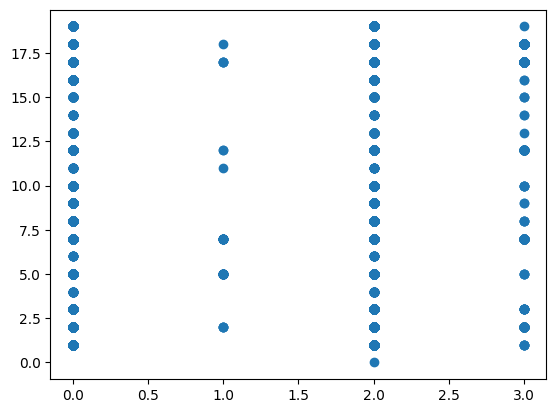

In [134]:
plt.scatter(filtered_df['Vict Sex'], filtered_df['Vict Descent'])

Text(0.5, 1.0, 'Distribución geográfica')

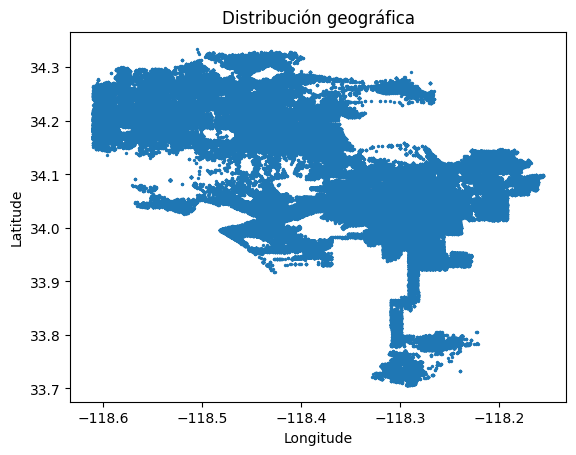

In [135]:
plt.scatter(filtered_df['LON'], filtered_df['LAT'], s=2)
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.title("Distribución geográfica")

Text(0.5, 1.0, 'Distribución racial de víctimas por crímen')

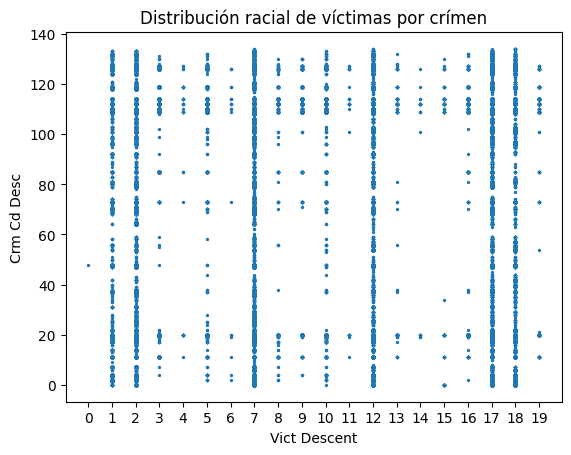

In [136]:
plt.scatter(filtered_df['Vict Descent'], filtered_df['Crm Cd Desc'], s=2)
xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("Crm Cd Desc")
plt.xlabel("Vict Descent")
plt.xticks(xtickslabel)
plt.title("Distribución racial de víctimas por crímen")

Text(0.5, 1.0, 'Distribución de descendencia y sexo de víctimas')

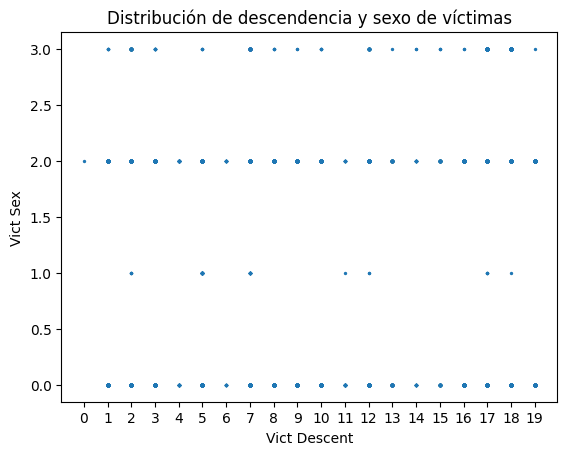

In [137]:
plt.scatter(filtered_df['Vict Descent'], filtered_df['Vict Sex'], s=2)
xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("Vict Sex")
plt.xlabel("Vict Descent")
plt.xticks(xtickslabel)
plt.title("Distribución de descendencia y sexo de víctimas")

Text(0.5, 1.0, 'Distribución racial y etaria de víctimas por crímen')

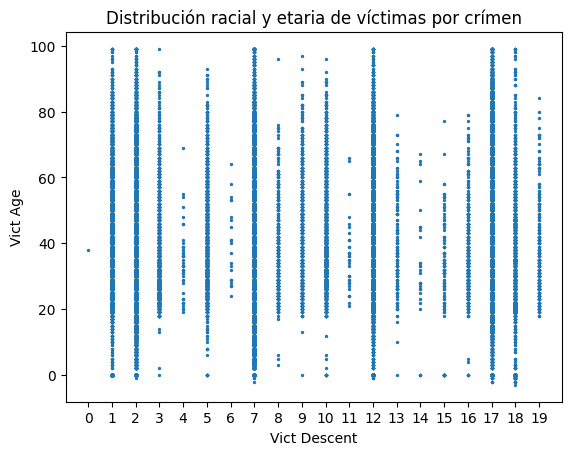

In [138]:
plt.scatter(filtered_df['Vict Descent'], filtered_df['Vict Age'], s=2)
xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("Vict Age")
plt.xlabel("Vict Descent")
plt.xticks(xtickslabel)
plt.title("Distribución racial y etaria de víctimas por crímen")

Text(0.5, 1.0, 'Distribución etaria y de víctimas por crímen')

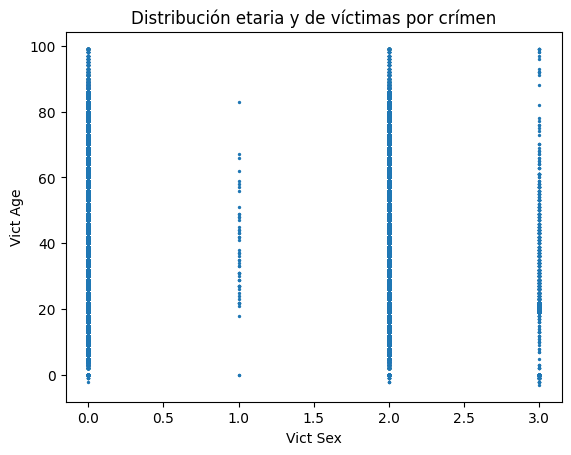

In [139]:
plt.scatter(filtered_df['Vict Sex'], filtered_df['Vict Age'], s=2)
plt.ylabel("Vict Age")
plt.xlabel("Vict Sex")
plt.title("Distribución etaria y de víctimas por crímen")

## Histogramas

Por medio de los siguientes gráficos será posible observar la frecuencia en la que ocurre un crimen, las fechas en las que más ocurrieron, las características de las víctimas, etc...

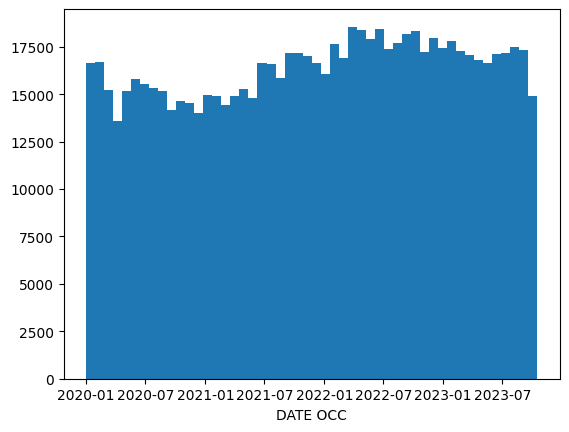

In [140]:
plt.hist(df['DATE OCC'], bins=50)
plt.xlabel('DATE OCC')
plt.show()

Por medio del siguiente histograma, será posible evidenciar las horas en las que más crímenes ocurrieron

(array([33972., 24870., 17071., 13317.,  9025., 15541., 13771., 11734.,
        15994., 12882., 30286., 25437., 24107., 27344., 23464., 55580.,
        29509., 27404., 20183., 42751., 41912., 39534., 32365., 25556.,
        44939., 40498., 29705., 35731., 21599., 34518.]),
 array([1.0000e+00, 7.9600e+01, 1.5820e+02, 2.3680e+02, 3.1540e+02,
        3.9400e+02, 4.7260e+02, 5.5120e+02, 6.2980e+02, 7.0840e+02,
        7.8700e+02, 8.6560e+02, 9.4420e+02, 1.0228e+03, 1.1014e+03,
        1.1800e+03, 1.2586e+03, 1.3372e+03, 1.4158e+03, 1.4944e+03,
        1.5730e+03, 1.6516e+03, 1.7302e+03, 1.8088e+03, 1.8874e+03,
        1.9660e+03, 2.0446e+03, 2.1232e+03, 2.2018e+03, 2.2804e+03,
        2.3590e+03]),
 <BarContainer object of 30 artists>)

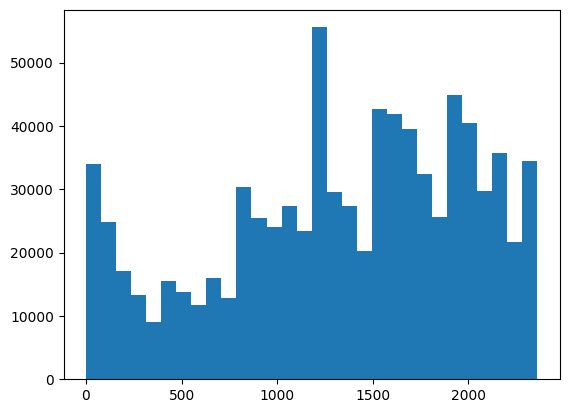

In [141]:
plt.hist(df['TIME OCC'], bins=30)

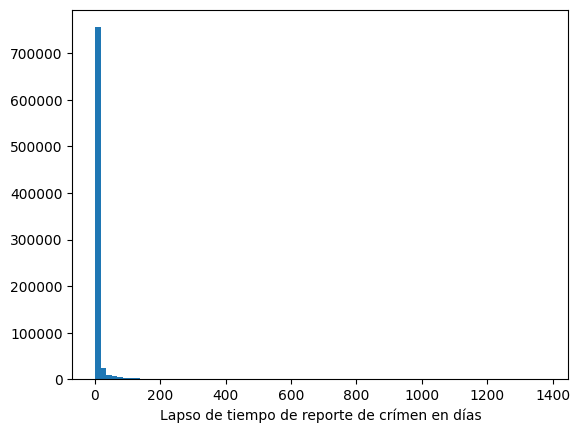

In [142]:
time_deltas = (df['Date Rptd'] - df['DATE OCC']) / np.timedelta64(1, 'D')
plt.hist(time_deltas, bins=80)
plt.xlabel('Lapso de tiempo de reporte de crímen en días')
plt.show()

In [143]:
print("El lapso de tiempo que tarda un crimen en ser reportado es: ")
print("Promedio:", time_deltas.mean(), "\nMínimo:", time_deltas.min(), "\nMáximo:", time_deltas.max())

El lapso de tiempo que tarda un crimen en ser reportado es: 
Promedio: 10.514407158673116 
Mínimo: 0.0 
Máximo: 1379.0


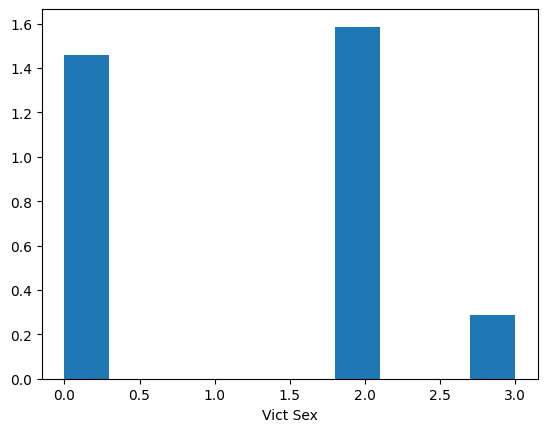

In [144]:
plt.hist(filtered_df['Vict Sex'], density=True, label="Vict Sex")
plt.xlabel('Vict Sex')
plt.show()
# print(df['Vict Sex'][encoder_sex.classes_].unique())


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


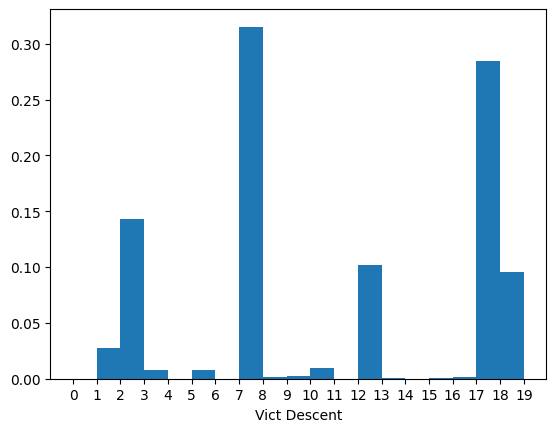

In [145]:
xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
print(xtickslabel)
plt.hist(filtered_df['Vict Descent'], density=True, label="Vict Descent", bins=encoder_descent.classes_.shape[0] - 1)
plt.xticks(xtickslabel)
plt.xlabel('Vict Descent')
plt.show()

Text(0.5, 0, 'Latitude')

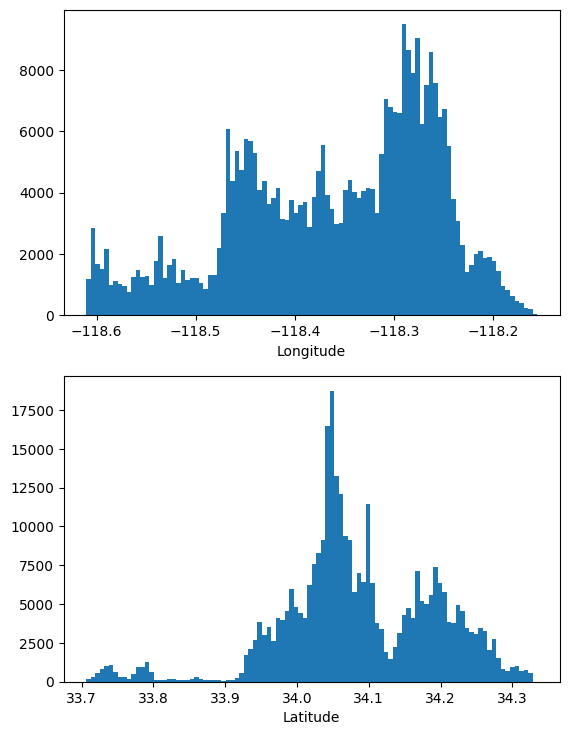

In [146]:
fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(bottom=0.1, top=1.5)
ax[0].hist(filtered_df["LON"], bins=100)
ax[0].set_xlabel("Longitude")
ax[1].hist(filtered_df["LAT"], bins=100)
ax[1].set_xlabel("Latitude")


## Cálculo media, mediana, moda, desviación estándar y varianza:

Parámetros:
- Vict Age
- Vict Sex
- Vict Descent
- AREA NAME
- LAT
- LON
- Crm Cd Desc
- DATE OCC
- TIME OCC
- Date Rptd - DATE OCC

In [147]:
from statistics import mode

parameters = ['Vict Age', 'Vict Sex', 'Vict Descent', 'AREA NAME', 'LAT', 'LON', 'Crm Cd Desc', 'DATE OCC', 'TIME OCC', 'Date Rptd']

def calculate_stats(parameter):
    filtered_df[parameter] = filtered_df[parameter].replace('NaN', 0.0)
    
        
    param_mean = filtered_df[parameter].mean()
    param_median = filtered_df[parameter].median()
    param_mode = mode(filtered_df[parameter])
    if filtered_df[parameter].dtype != 'datetime64[ns]':
        param_std_deviation = filtered_df[parameter].std()
        param_var = filtered_df[parameter].var()
    else:
        param_std_deviation = 0.0
        param_var = 0.0
    
    
    return param_mean, param_median, param_mode, param_std_deviation, param_var
    
for p in parameters:
    print(f"\n{p}\nMedia: {calculate_stats(p)[0]}\nMediana: {calculate_stats(p)[1]}\nModa: {calculate_stats(p)[2]}\nDesviación Estándar: {calculate_stats(p)[3]}\nVarianza:{calculate_stats(p)[4]}")


Vict Age
Media: 35.41063273731833
Mediana: 35.0
Moda: 0
Desviación Estándar: 19.693314913134223
Varianza:387.82665226787486

Vict Sex
Media: 1.2123048651740431
Mediana: 2.0
Moda: 2
Desviación Estándar: 1.1022780080980727
Varianza:1.2150168071366552

Vict Descent
Media: 10.536976357158721
Mediana: 7.0
Moda: 7
Desviación Estándar: 5.923669469145485
Varianza:35.08985997968635

AREA NAME
Media: 10.143515180280087
Mediana: 10.0
Moda: 1
Desviación Estándar: 6.080881887688062
Varianza:36.97712453201274

LAT
Media: 34.08539391693517
Mediana: 34.0691
Moda: 34.1016
Desviación Estándar: 0.10769610188767803
Varianza:0.011598450361801129

LON
Media: -118.3595322931213
Mediana: -118.3402
Moda: -118.2739
Desviación Estándar: 0.10206000220745103
Varianza:0.010416244050584908

Crm Cd Desc
Media: 75.7754219110815
Mediana: 102.0
Moda: 112
Desviación Estándar: 46.419925144011614
Varianza:2154.8094503756415

DATE OCC
Media: 2021-12-12 03:02:49.976542464
Mediana: 2022-01-10 00:00:00
Moda: 2020-01-01 00:00:

## Base de datos nacional

Se realizó el mismo procedimiento que para la base de datos internacional, con 8 columnas y 86792 registros. Se eliminó la columna de Código DANE, que no provee información importante al conjunto de datos para el análisis realizado.

In [148]:
# df_nacional = pd.read_csv('./HURTO_PERSONAS_20231020.csv', parse_dates=['FECHA HECHO'], dayfirst=True)
df_nacional = pd.read_excel('./hurto_a_personas_20.xlsx')

df_nacional.head(5)

,ARMA MEDIO,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CODIGO DANE,CANTIDAD
0,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-01-21,MASCULINO,ADULTOS,91001000,1
1,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-02-10,MASCULINO,ADULTOS,91001000,1
2,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-03-13,MASCULINO,ADULTOS,91001000,1
3,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-03-25,MASCULINO,ADULTOS,91001000,1
4,ARMA BLANCA / CORTOPUNZANTE,AMAZONAS,Leticia (CT),2023-04-15,MASCULINO,ADULTOS,91001000,1


In [149]:
df_nacional.describe()

,FECHA HECHO,CODIGO DANE,CANTIDAD
count,86792,8.679200e+04,86792.000000
mean,2023-05-28 22:52:16.436537856,3.712167e+07,3.552874
min,2023-01-01 00:00:00,5.001000e+06,1.000000
25%,2023-03-15 00:00:00,1.300100e+07,1.000000
50%,2023-05-28 00:00:00,2.575400e+07,1.000000
75%,2023-08-11 00:00:00,6.600100e+07,2.000000
max,2023-10-31 00:00:00,9.977300e+07,222.000000
std,NaN,2.577331e+07,12.282469


In [150]:
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86792 entries, 0 to 86791
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ARMA MEDIO           86792 non-null  object        
 1   DEPARTAMENTO         86792 non-null  object        
 2   MUNICIPIO            86792 non-null  object        
 3   FECHA HECHO          86792 non-null  datetime64[ns]
 4   GENERO               86792 non-null  object        
 5   AGRUPA_EDAD_PERSONA  86792 non-null  object        
 6   CODIGO DANE          86792 non-null  int64         
 7   CANTIDAD             86792 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 5.3+ MB


In [151]:
df_nacional = df_nacional.dropna()
# df_nacional = df_nacional.drop(labels=['COD_DEPTO', 'COD_MUNI'],axis=1)
df_nacional = df_nacional.drop(labels=['CODIGO DANE '], axis=1)
df_nacional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86792 entries, 0 to 86791
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ARMA MEDIO           86792 non-null  object        
 1   DEPARTAMENTO         86792 non-null  object        
 2   MUNICIPIO            86792 non-null  object        
 3   FECHA HECHO          86792 non-null  datetime64[ns]
 4   GENERO               86792 non-null  object        
 5   AGRUPA_EDAD_PERSONA  86792 non-null  object        
 6   CANTIDAD             86792 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 4.6+ MB


In [152]:
df_nacional.columns

Index(['ARMA MEDIO ', 'DEPARTAMENTO ', 'MUNICIPIO ', 'FECHA HECHO ', 'GENERO ',
       'AGRUPA_EDAD_PERSONA', 'CANTIDAD '],
      dtype='object')

In [153]:
encoder_departamento = LabelEncoder()
df_nacional["DEPARTAMENTO "] = encoder_departamento.fit_transform(df_nacional['DEPARTAMENTO '])
print(encoder_departamento.classes_)

encoder_municipio = LabelEncoder()
df_nacional["MUNICIPIO "] = encoder_municipio.fit_transform(df_nacional['MUNICIPIO '])
print(encoder_municipio.classes_)

encoder_arma = LabelEncoder()
df_nacional["ARMA MEDIO "] = encoder_arma.fit_transform(df_nacional['ARMA MEDIO '])
print(encoder_arma.classes_)

encoder_genero = LabelEncoder()
df_nacional['GENERO '] = encoder_genero.fit_transform(df_nacional['GENERO '])
print(encoder_genero.classes_)

encoder_edad = LabelEncoder()
df_nacional['AGRUPA_EDAD_PERSONA'] = encoder_edad.fit_transform(df_nacional['AGRUPA_EDAD_PERSONA'])
print(encoder_edad.classes_)

df_nacional.head()

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLÁNTICO' 'BOLÍVAR' 'BOYACÁ' 'CALDAS'
 'CAQUETÁ' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCÓ' 'CUNDINAMARCA' 'CÓRDOBA'
 'GUAINÍA' 'GUAJIRA' 'GUAVIARE' 'HUILA' 'MAGDALENA' 'META' 'NARIÑO'
 'NORTE DE SANTANDER' 'PUTUMAYO' 'QUINDÍO' 'RISARALDA' 'SAN ANDRÉS'
 'SANTANDER' 'SUCRE' 'TOLIMA' 'VALLE' 'VAUPÉS' 'VICHADA']
['Abejorral' 'Abrego' 'Acacías' 'Acandí' 'Acevedo' 'Achí' 'Agrado'
 'Agua de Dios' 'Aguachica' 'Aguadas' 'Aguazul' 'Agustín Codazzi' 'Aipe'
 'Albania' 'Albán' 'Alcalá' 'Aldana' 'Alejandría' 'Algarrobo' 'Algeciras'
 'Almaguer' 'Alpujarra' 'Altamira' 'Alto Baudó' 'Alvarado' 'Amagá'
 'Amalfi' 'Ambalema' 'Anapoima' 'Ancuyá' 'Andalucía' 'Andes' 'Angelópolis'
 'Angostura' 'Anolaima' 'Anorí' 'Anserma' 'Ansermanuevo' 'Anza'
 'Anzoátegui' 'Apartadó' 'Apulo' 'Apía' 'Aquitania' 'Aracataca' 'Aranzazu'
 'Aratoca' 'Arauca (CT)' 'Arauquita' 'Arbeláez' 'Arboleda' 'Arboledas'
 'Arboletes' 'Arcabuco' 'Arenal' 'Argelia' 'Ariguaní' 'Arjona' 'Armenia'
 'Armenia (CT)' 'Armero

,ARMA MEDIO,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,AGRUPA_EDAD_PERSONA,CANTIDAD
0,0,0,432,2023-01-21,1,1,1
1,0,0,432,2023-02-10,1,1,1
2,0,0,432,2023-03-13,1,1,1
3,0,0,432,2023-03-25,1,1,1
4,0,0,432,2023-04-15,1,1,1


In [154]:
encoder_departamento.classes_

array(['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOLÍVAR',
       'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR',
       'CHOCÓ', 'CUNDINAMARCA', 'CÓRDOBA', 'GUAINÍA', 'GUAJIRA',
       'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO',
       'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA',
       'SAN ANDRÉS', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE', 'VAUPÉS',
       'VICHADA'], dtype=object)

En la matriz de correlación se observan valores que tampoco daba lugar a realizar un análisis apropiado de los datos.

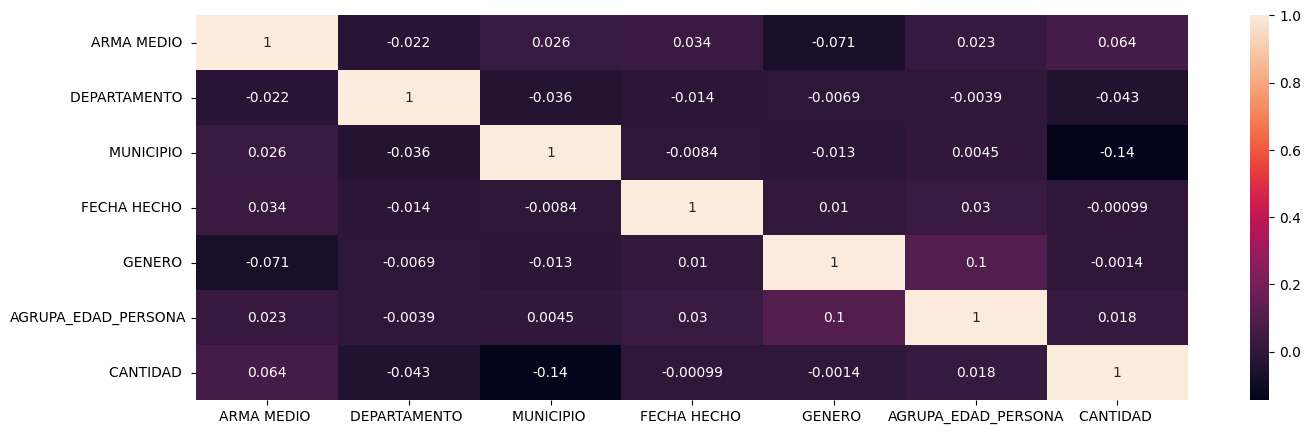

In [155]:
corr_matrix = df_nacional.corr()
plt.figure(figsize=(16,5))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [156]:
pd.pivot_table(df_nacional, values=['MUNICIPIO ', 'ARMA MEDIO ', 'GENERO '], index='AGRUPA_EDAD_PERSONA', aggfunc={'MUNICIPIO ': ['min', 'count', pd.Series.mode, 'max'], 'ARMA MEDIO ': pd.Series.mode, 'GENERO ': pd.Series.mode}, dropna=True)

ARMA MEDIO  GENERO  MUNICIPIO               
                           mode    mode      count  max min mode
AGRUPA_EDAD_PERSONA                                             
0                             7       1       3354  942   1   92
1                             7       1      82551  943   0   92
2                             7       1        434  934   2   92
3                             7       2        453  941  59   92

In [157]:
pd.pivot_table(df_nacional, values=['MUNICIPIO ', 'GENERO ', 'ARMA MEDIO '], index='DEPARTAMENTO ', aggfunc={'ARMA MEDIO ': pd.Series.mode, 'GENERO ': pd.Series.mode}, dropna=True)

,ARMA MEDIO,GENERO
DEPARTAMENTO,,
0,7,1
1,7,1
2,7,1
3,1,1
4,7,1
5,7,1
6,7,1
7,7,1
8,7,1


Text(0.5, 1.0, 'Distribución etaria de víctimas por municipio')

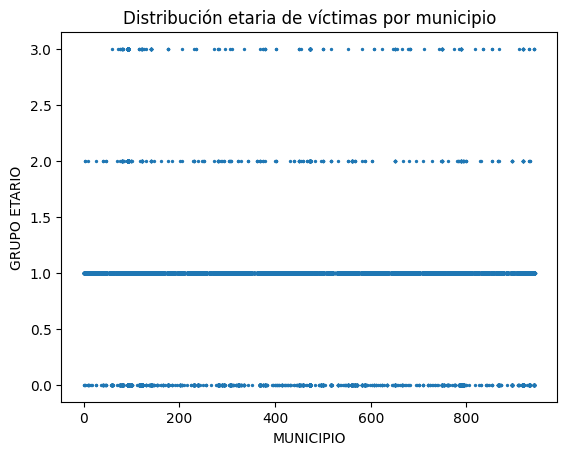

In [158]:
plt.scatter(df_nacional['MUNICIPIO '], df_nacional['AGRUPA_EDAD_PERSONA'], s=2)
# xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("GRUPO ETARIO")
plt.xlabel("MUNICIPIO")
# plt.xticks(xtickslabel)
plt.title("Distribución etaria de víctimas por municipio")

Text(0.5, 1.0, 'Armas usualmente usadas por municipio')

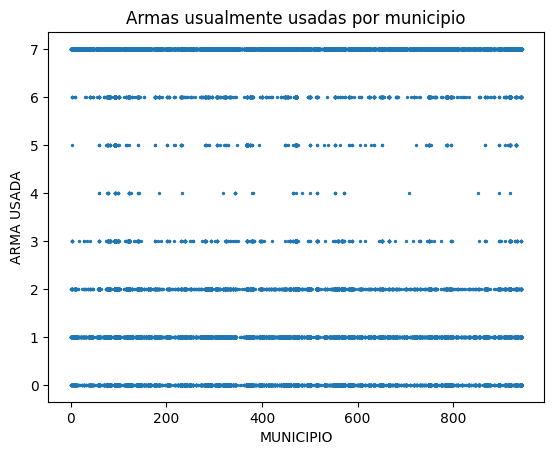

In [159]:
plt.scatter(df_nacional['MUNICIPIO '], df_nacional['ARMA MEDIO '], s=2)
# xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("ARMA USADA")
plt.xlabel("MUNICIPIO")
# plt.xticks(xtickslabel)
plt.title("Armas usualmente usadas por municipio")

Text(0.5, 1.0, 'Género de las víctimas por municipio')

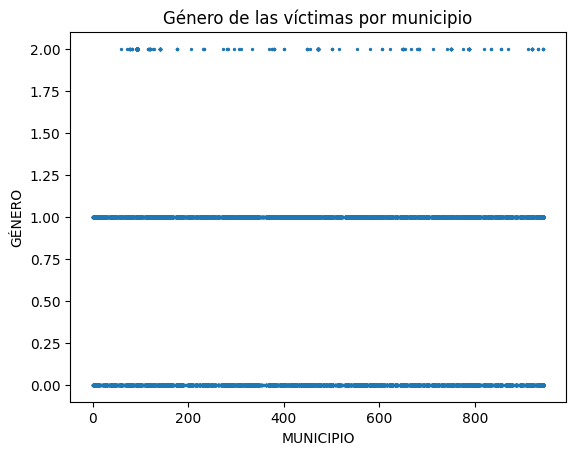

In [160]:
plt.scatter(df_nacional['MUNICIPIO '], df_nacional['GENERO '], s=2)
# xtickslabel=[x for x in range(encoder_descent.classes_.shape[0])]
plt.ylabel("GÉNERO")
plt.xlabel("MUNICIPIO")
# plt.xticks(xtickslabel)
plt.title("Género de las víctimas por municipio")

In [161]:
df_pie_genero = df_nacional.groupby(['GENERO '])['GENERO '].count().reset_index(name="count")

import plotly.express as px
fig = px.pie(df_pie_genero, values='count', names=['Femenino', 'Masculino', 'No reportado'], title="Distribución de género de las víctimas")
fig.show()

In [162]:
df_pie_edad = df_nacional.groupby(['AGRUPA_EDAD_PERSONA'])['AGRUPA_EDAD_PERSONA'].count().reset_index(name="count")
fig = px.pie(df_pie_edad, values='count', names=['ADOLESCENTES', 'ADULTOS', 'MENORES', 'NO REPORTADO'], title="Distribución etaria de las víctimas")
fig.show()

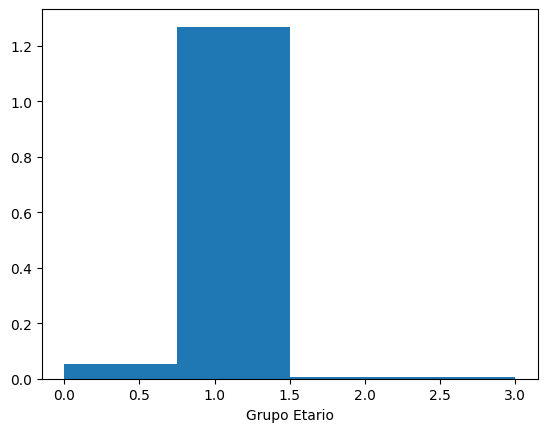

In [163]:
plt.hist(df_nacional['AGRUPA_EDAD_PERSONA'], density=True, label="Grupo Etario", bins=4)
plt.xlabel('Grupo Etario')
plt.show()

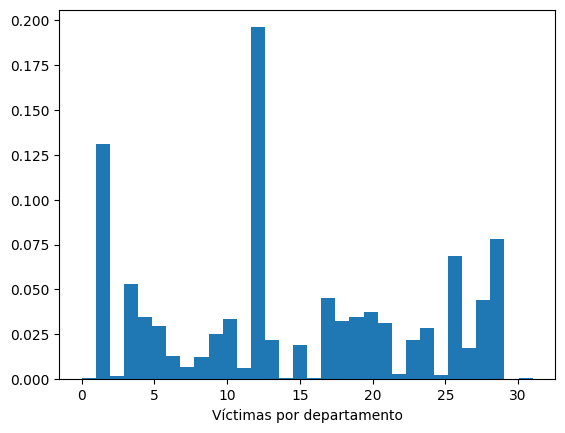

In [164]:
plt.hist(df_nacional['DEPARTAMENTO '], density=True, label="Víctimas por departamento", bins=32)
plt.xlabel('Víctimas por departamento')
plt.show()

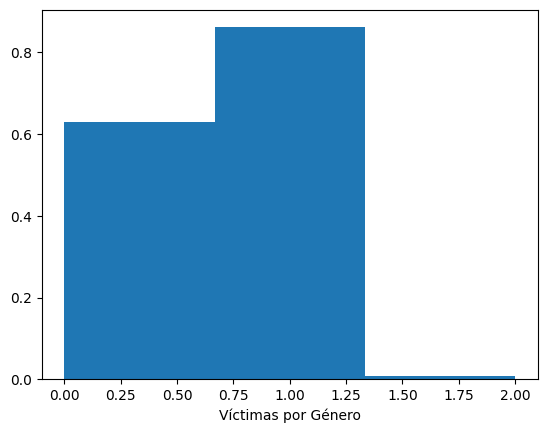

In [165]:
plt.hist(df_nacional['GENERO '], density=True, label="Víctimas por Género", bins=3)
plt.xlabel('Víctimas por Género')
plt.show()

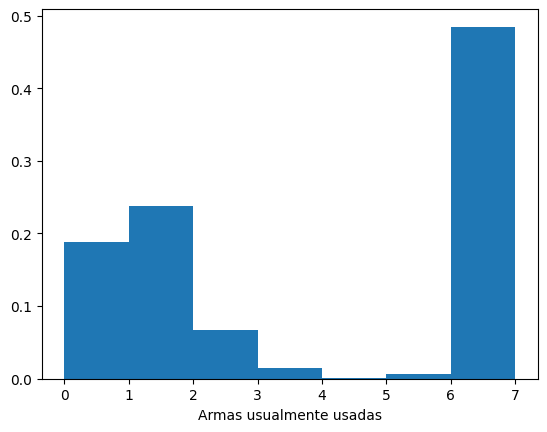

In [166]:
plt.hist(df_nacional['ARMA MEDIO '], density=True, label="Armas usualmente usadas", bins=7)
plt.xlabel('Armas usualmente usadas')
plt.show()

In [167]:
parameters = list(df_nacional.columns)

def calculate_stats_nacional(parameter):
    df_nacional[parameter] = df_nacional[parameter].replace('NaN', 0.0)
    
        
    param_mean = df_nacional[parameter].mean()
    param_median = df_nacional[parameter].median()
    param_mode = mode(df_nacional[parameter])
    if df_nacional[parameter].dtype != 'datetime64[ns]':
        param_std_deviation = df_nacional[parameter].std()
        param_var = df_nacional[parameter].var()
    else:
        param_std_deviation = 0.0
        param_var = 0.0
    
    
    return param_mean, param_median, param_mode, param_std_deviation, param_var

for p in parameters:
    print(f"\n{p}\nMedia: {calculate_stats_nacional(p)[0]}\nMediana: {calculate_stats_nacional(p)[1]}\nModa: {calculate_stats_nacional(p)[2]}\nDesviación Estándar: {calculate_stats_nacional(p)[3]}\nVarianza:{calculate_stats_nacional(p)[4]}")


ARMA MEDIO 
Media: 3.8176790487602545
Mediana: 3.0
Moda: 7
Desviación Estándar: 3.102788991734255
Varianza:9.627299527227276

DEPARTAMENTO 
Media: 14.41420868282791
Mediana: 12.0
Moda: 12
Desviación Estándar: 9.197178546202553
Varianza:84.5880932107285

MUNICIPIO 
Media: 427.66223845515714
Mediana: 409.0
Moda: 92
Desviación Estándar: 274.8412311023184
Varianza:75537.70231383799

FECHA HECHO 
Media: 2023-05-28 22:52:16.436537856
Mediana: 2023-05-28 00:00:00
Moda: 2023-07-01 00:00:00
Desviación Estándar: 0.0
Varianza:0.0

GENERO 
Media: 0.5849502258272652
Mediana: 1.0
Moda: 1
Desviación Estándar: 0.5032147919687874
Varianza:0.2532251268561899

AGRUPA_EDAD_PERSONA
Media: 0.9767950963222417
Mediana: 1.0
Moda: 1
Desviación Estándar: 0.2529512708555554
Varianza:0.06398434542744057

CANTIDAD 
Media: 3.552873536731496
Mediana: 1.0
Moda: 1
Desviación Estándar: 12.282469005469544
Varianza:150.85904487032


# Conclusión

No se pudo generar un análisis ANOVA debido a que los datos son de tipo categórico, por lo que se procedió a realizar el análisis de correlación requerido, además de unas gráficas que permiten caracterizar el conjunto de datos.